# Principal Component Analysis with Cancer Data

In [36]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [71]:
data = pd.read_csv("breast-cancer-wisconsin-data.csv")

In [72]:
data.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [4]:
data.shape

(699, 11)

In [0]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [5]:
data.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [6]:
data.shape

(699, 11)

In [7]:
data.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [22]:
data.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [21]:
#To check missings values and incorrect data, let us find the unique values
for col in data:
    print(data[col].unique())
    

[ 1000025  1002945  1015425  1016277  1017023  1017122  1018099  1018561
  1033078  1035283  1036172  1041801  1043999  1044572  1047630  1048672
  1049815  1050670  1050718  1054590  1054593  1056784  1057013  1059552
  1065726  1066373  1066979  1067444  1070935  1071760  1072179  1074610
  1075123  1079304  1080185  1081791  1084584  1091262  1096800  1099510
  1100524  1102573  1103608  1103722  1105257  1105524  1106095  1106829
  1108370  1108449  1110102  1110503  1110524  1111249  1112209  1113038
  1113483  1113906  1115282  1115293  1116116  1116132  1116192  1116998
  1117152  1118039  1120559  1121732  1121919  1123061  1124651  1125035
  1126417  1131294  1132347  1133041  1133136  1136142  1137156  1143978
  1147044  1147699  1147748  1148278  1148873  1152331  1155546  1156272
  1156948  1157734  1158247  1160476  1164066  1165297  1165790  1165926
  1166630  1166654  1167439  1167471  1168359  1168736  1169049  1170419
  1170420  1171710  1171795  1171845  1172152  1173

In [0]:
# We could see "?" values in column - Bare Nuclei, this should be removed from data set.

# Check for missing value in any other column - As seen above , no other cols contain missing values.

In [0]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [73]:
data[data["Bare Nuclei"] == "?"]

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


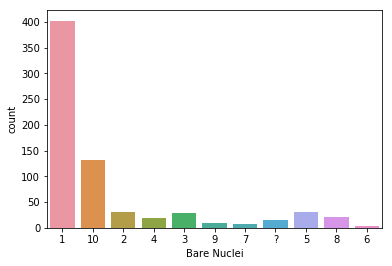

In [26]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

#data[""].replace("?",data[""].mode,inplace=True)
sns.countplot("Bare Nuclei", data=data)

In [ ]:
#As the count of 1 value is maximum , we would replace the "?", with that value or the column's mode().

In [39]:
data["Bare Nuclei"].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [74]:
data["Bare Nuclei"].replace("?",1,inplace=True)


In [75]:
data["Bare Nuclei"].unique()

array(['1', '10', '2', '4', '3', '9', '7', 1, '5', '8', '6'], dtype=object)

In [76]:
#We have to change the datatype of Bare Nuclei column

In [77]:
data['Bare Nuclei'] = data['Bare Nuclei'].astype('int64')

In [78]:
data.dtypes

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

In [79]:
data["Bare Nuclei"].unique()

array([ 1, 10,  2,  4,  3,  9,  7,  5,  8,  6], dtype=int64)

In [80]:
data[data.duplicated("ID")].count()

ID                             54
ClumpThickness                 54
Cell Size                      54
Cell Shape                     54
Marginal Adhesion              54
Single Epithelial Cell Size    54
Bare Nuclei                    54
Normal Nucleoli                54
Bland Chromatin                54
Mitoses                        54
Class                          54
dtype: int64

In [81]:
# There are duplicate rows in the data that we found above with the helkp of primary key.Removing those rows.
data.drop_duplicates(subset=["ID"], keep="first", inplace=True)

In [82]:
data.shape

(645, 11)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [0]:
# Check for correlation of variable

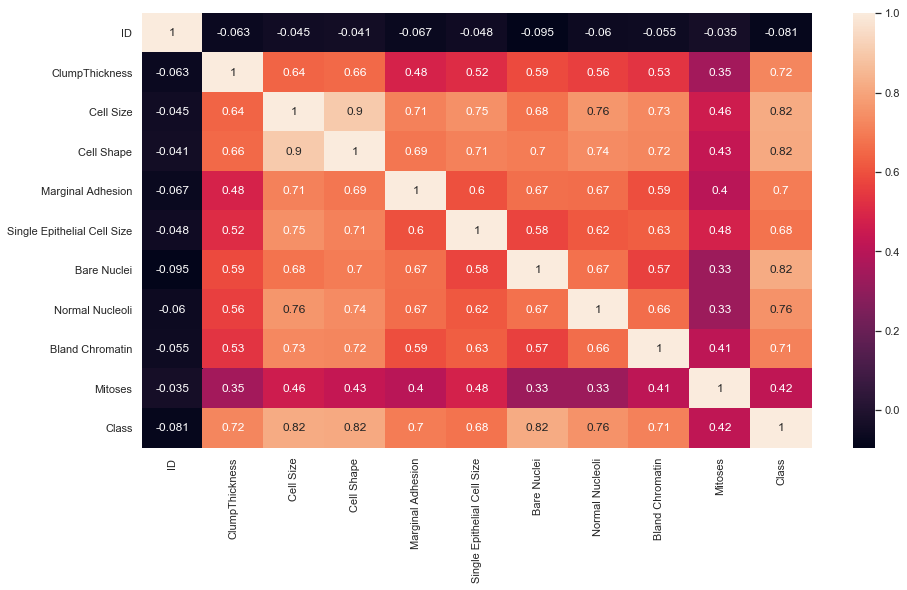

In [55]:
sns.set(rc={'figure.figsize':(15,8)})
corr = data.corr()
sns.heatmap(corr, annot=True)

In [0]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [0]:
#Let us check for pair plots

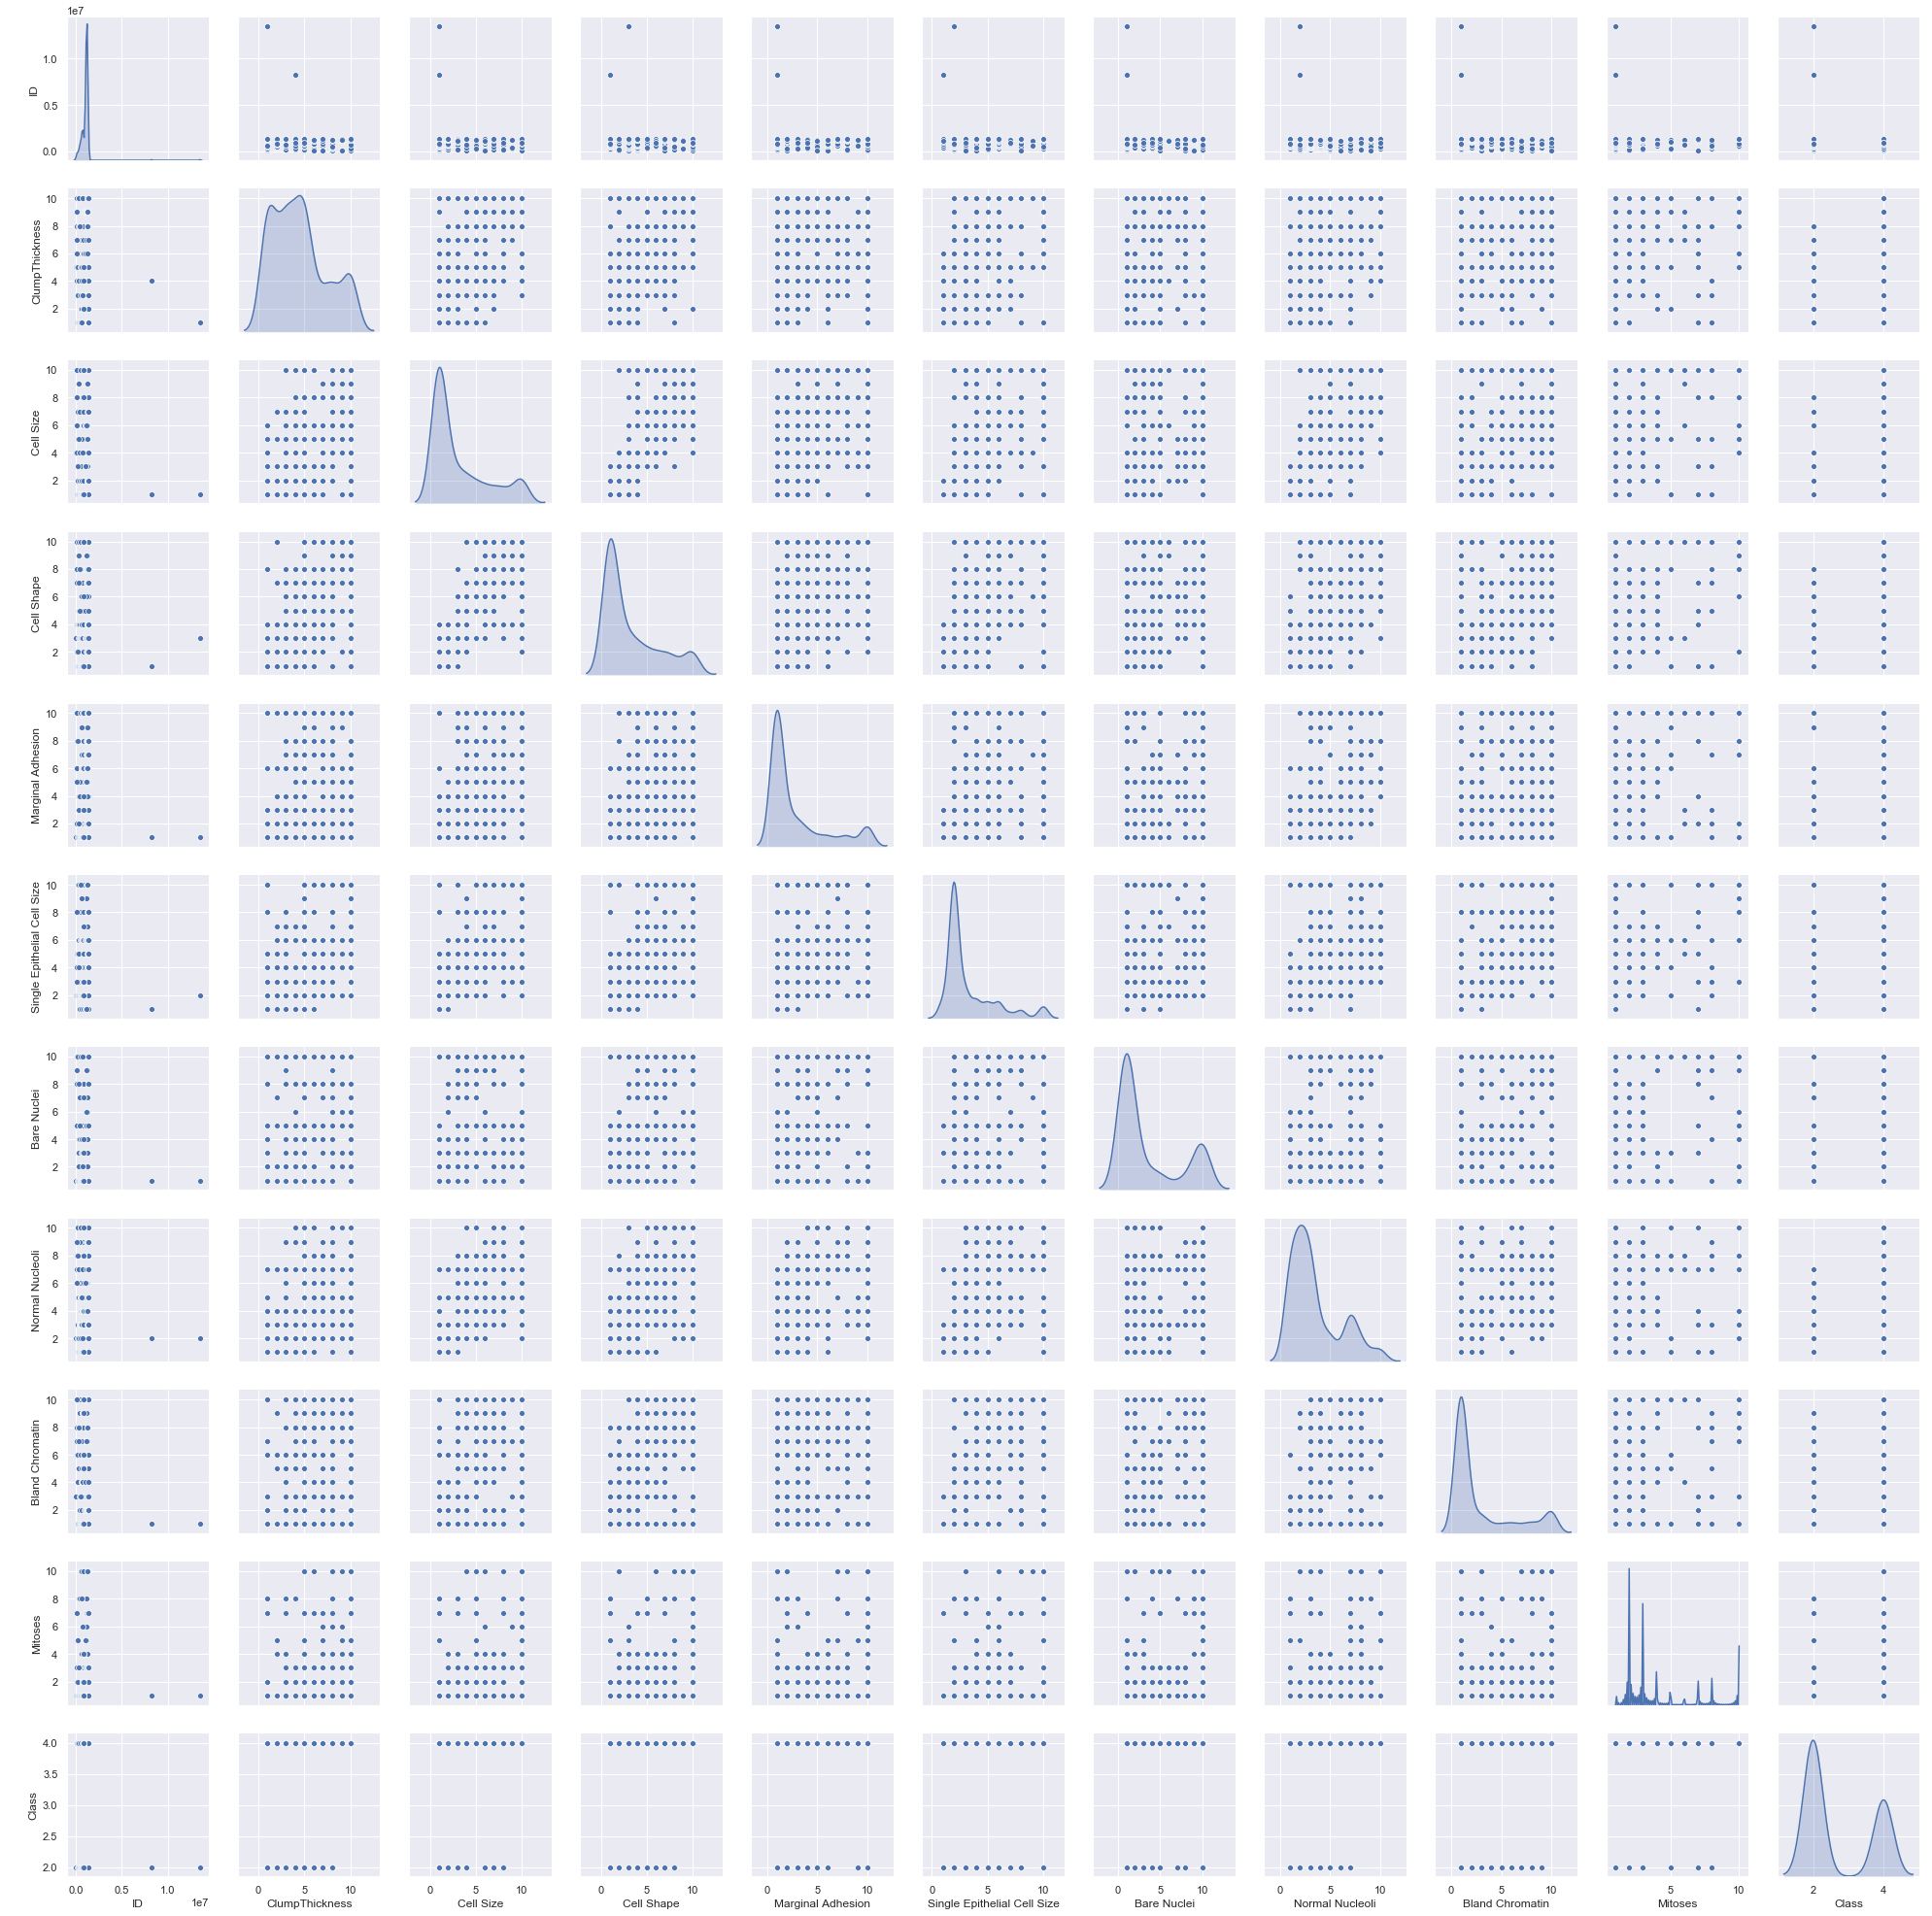

In [56]:
sns.pairplot(data=data, diag_kind='kde');

In [0]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [ ]:
#Removing ID column as we wont need it ahead

In [83]:
data.drop("ID",axis=1, inplace=True)

In [84]:
data.shape

(645, 10)

In [59]:
#Checking for outliers

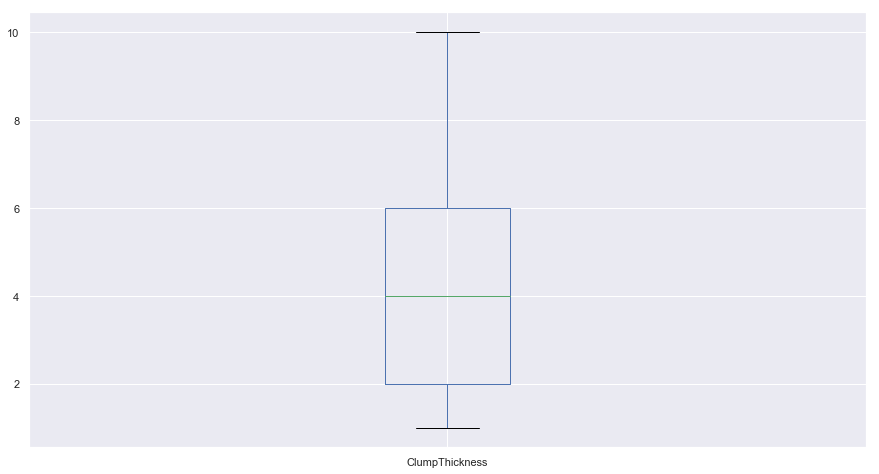

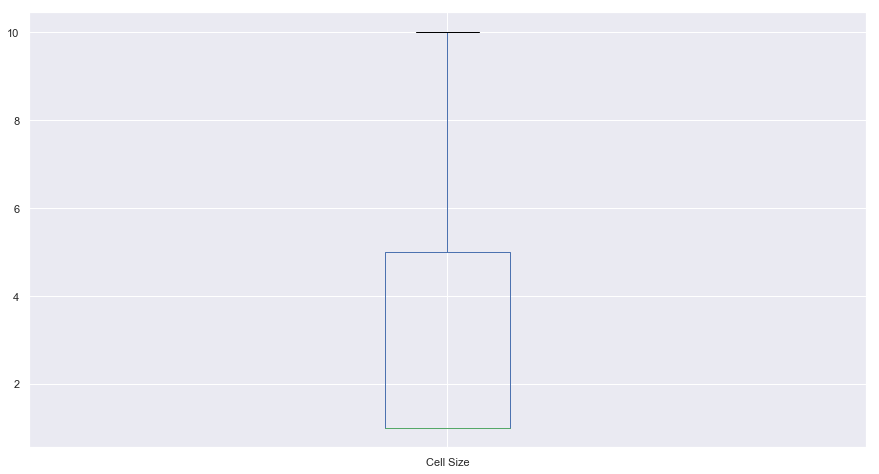

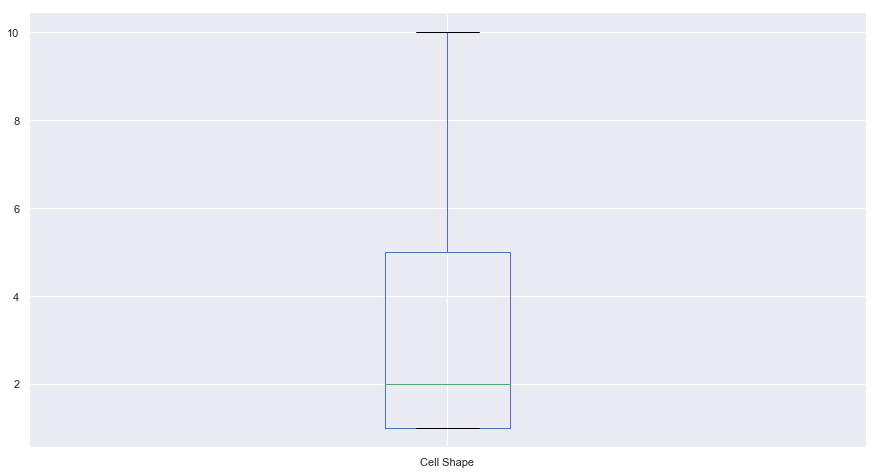

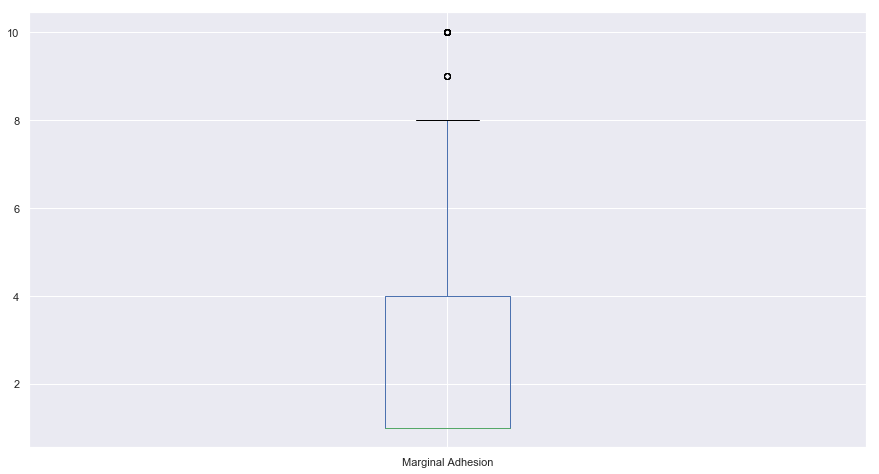

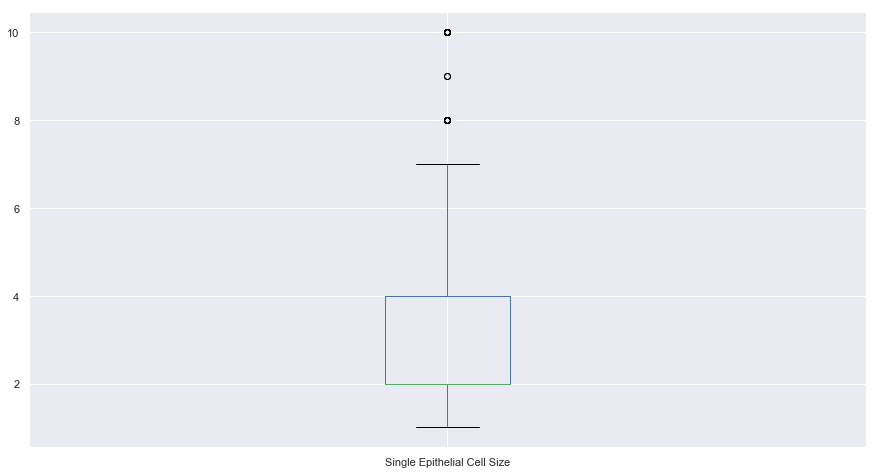

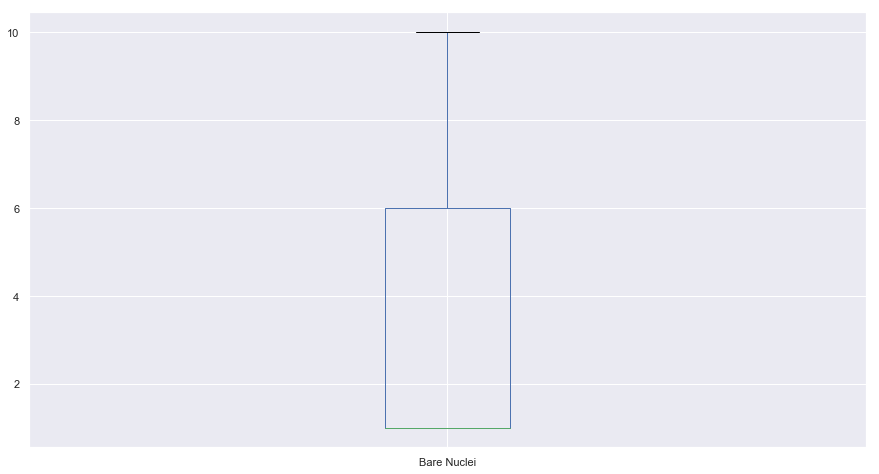

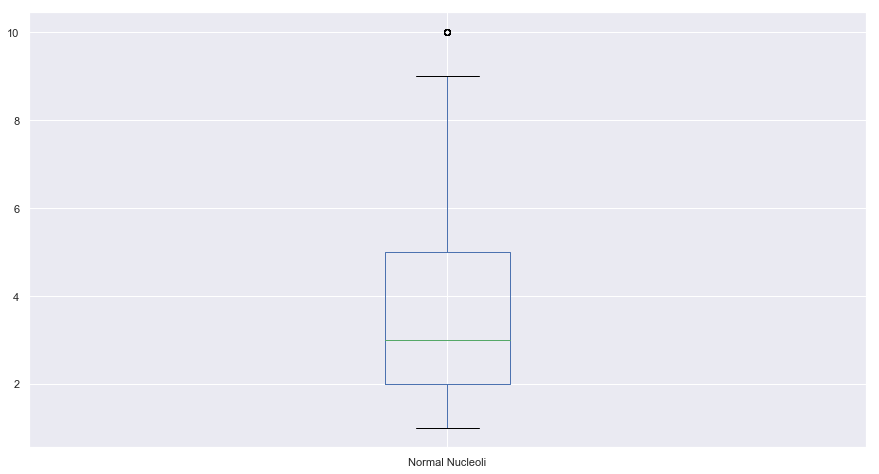

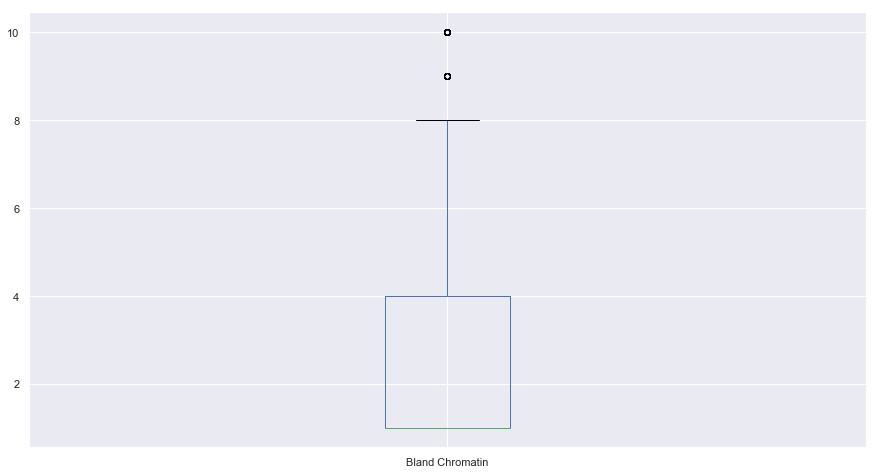

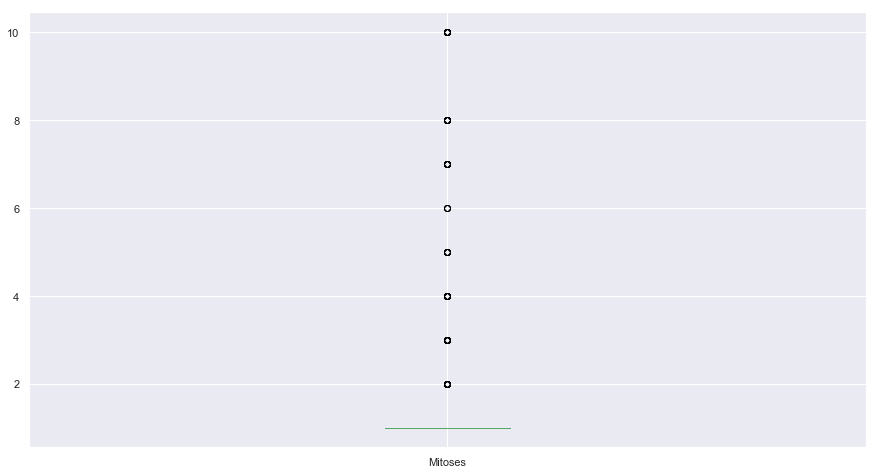

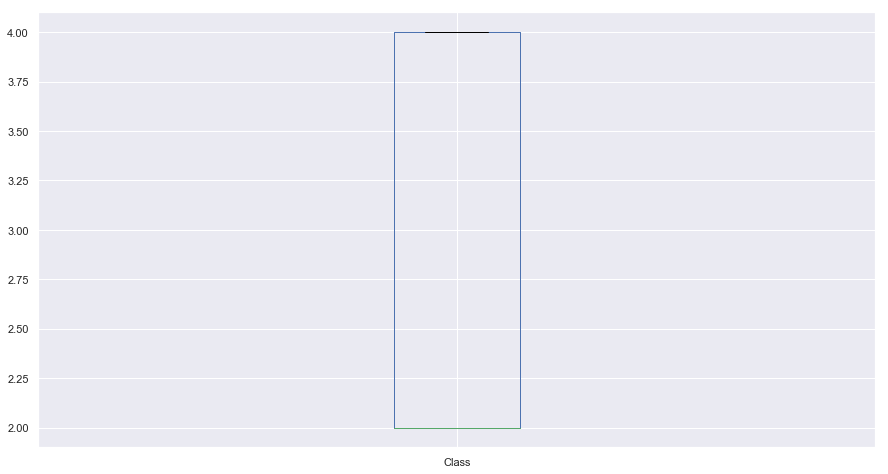

In [60]:
#for col in data.columns : 
#    sns.boxplot(col)
#    sns.title(f)


for column in data:
    plt.figure()
    data.boxplot([column])

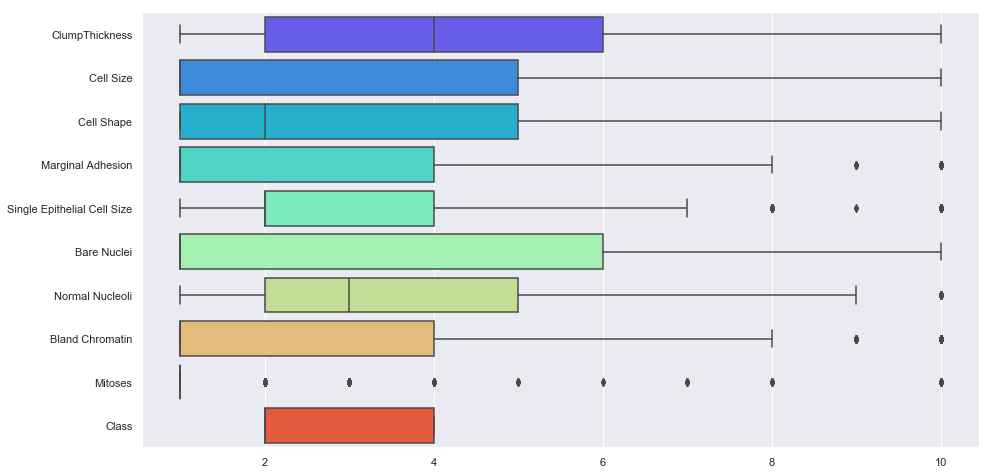

In [61]:
sns.boxplot(data=data,palette='rainbow',orient='h')

In [ ]:
#clean_model.drop(clean_model[clean_model.num_likes > (1938 + (1.5* (1938-125)))].index, inplace=True)


In [0]:
# We could see most of the outliers are now removed.

In [62]:
pd.crosstab(data["Bland Chromatin"], data["Class"])

Class,2,4
Bland Chromatin,,
1,365,40
2,23,6
3,12,29
4,1,15
5,1,17
6,4,17
7,2,14
8,4,19
9,1,15


In [85]:
data["Bland Chromatin"] = np.where(data["Bland Chromatin"]> 9, 9, data["Bland Chromatin"])

In [ ]:
#We are replacing all the values above 9 with 9 for col "Bland Chromatin " as above 8 we can see that mostly it belongs to class 4

In [63]:
pd.crosstab(data["Single Epithelial Cell Size"],data["Class"])

Class,2,4
Single Epithelial Cell Size,,
1,39,1
2,329,23
3,27,40
4,6,38
5,4,34
6,2,38
7,3,9
8,2,18
9,0,2


In [86]:
data["Single Epithelial Cell Size"] = np.where(data["Single Epithelial Cell Size"]> 8, 8, data["Single Epithelial Cell Size"])

In [ ]:
#We are replacing all the values above 8 with 8 for col "Single Epithelial Cell Size " as above 8 we can see that mostly it belongs to class 4

In [65]:
pd.crosstab(data["Mitoses"],data["Class"])

Class,2,4
Mitoses,,
1,401,129
2,8,26
3,1,29
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,13


In [87]:
data["Mitoses"] = np.where(data["Mitoses"]> 3, 3, data["Mitoses"])

In [88]:
pd.crosstab(data["Mitoses"],data["Class"])

Class,2,4
Mitoses,,
1,401,129
2,8,26
3,4,77


In [ ]:
#We are replacing all the values above 3 with 3 for col "Mitoses " as above 3 we can see that mostly it belongs to class 4

In [66]:
pd.crosstab(data["Marginal Adhesion"],data["Class"])

Class,2,4
Marginal Adhesion,,
1,337,31
2,36,18
3,27,26
4,5,27
5,2,17
6,4,18
7,0,13
8,0,25
9,1,4


In [89]:
data["Marginal Adhesion"] = np.where(data["Marginal Adhesion"]> 6, 6, data["Marginal Adhesion"])

In [ ]:
#We are replacing all the values above 6 with 6 for col "Marginal Adhesion " as above 6 we can see that mostly it belongs to class 4

In [ ]:
#Standardize the data

In [90]:
# Data scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop('Class', axis=1, inplace=False))

C:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [92]:
data_scaled.shape

(645, 9)

# Q6 Create a covariance matrix for identifying Principal components

In [93]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(data_scaled.T)
print('Covariance Matrix \n%s', cov_matrix)


Covariance Matrix 
%s [[1.0015528  0.64576496 0.65699092 0.52854487 0.53144607 0.58950616
  0.5621321  0.5425857  0.42333903]
 [0.64576496 1.0015528  0.90520515 0.73513628 0.77112409 0.6774891
  0.76222363 0.7304198  0.51167792]
 [0.65699092 0.90520515 1.0015528  0.71023492 0.73599853 0.70021306
  0.73627599 0.72509179 0.48137817]
 [0.52854487 0.73513628 0.71023492 1.0015528  0.64321173 0.69758347
  0.69753459 0.63086401 0.44438606]
 [0.53144607 0.77112409 0.73599853 0.64321173 1.0015528  0.60380109
  0.64052126 0.66583202 0.50480014]
 [0.58950616 0.6774891  0.70021306 0.69758347 0.60380109 1.0015528
  0.6730325  0.5785703  0.43734461]
 [0.5621321  0.76222363 0.73627599 0.69753459 0.64052126 0.6730325
  1.0015528  0.66661348 0.38778245]
 [0.5425857  0.7304198  0.72509179 0.63086401 0.66583202 0.5785703
  0.66661348 1.0015528  0.4769531 ]
 [0.42333903 0.51167792 0.48137817 0.44438606 0.50480014 0.43734461
  0.38778245 0.4769531  1.0015528 ]]


# Q7 Identify eigen values and eigen vector

In [0]:
# Step 2- Get eigen values and eigen vector

In [99]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)


In [98]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-3.01419764e-01  5.18282299e-03 -5.56979243e-03 -8.56492132e-01
   2.84474207e-01 -1.81240638e-02 -2.45121499e-01  1.84853502e-01
  -2.16325721e-04]
 [-3.76253546e-01 -6.57895275e-02 -7.44318609e-01  9.18352919e-02
   1.99870848e-01  1.82225948e-01  3.90181012e-01  1.87825235e-02
  -2.56734177e-01]
 [-3.71604711e-01 -1.03881741e-01  6.48067681e-01  1.35008747e-02
   1.98148235e-01  1.59265303e-01  5.86151896e-01 -3.31750731e-02
  -1.47111317e-01]
 [-3.38759611e-01 -1.56764198e-01  5.85988823e-02  1.63648005e-01
  -4.68986425e-01 -2.91977784e-02 -1.25122457e-01  7.64864651e-01
  -9.47526917e-02]
 [-3.38803007e-01  8.41498196e-02  7.69249659e-02  3.09829969e-01
   2.45300350e-01  6.36616577e-01 -4.87285751e-01 -7.78688235e-02
   2.59336433e-01]
 [-3.30397969e-01 -1.53186495e-01 -9.25056296e-02 -2.19127832e-01
  -6.03794697e-01  6.37174300e-02  1.61199766e-01 -4.02749505e-01
   5.03960619e-01]
 [-3.42035514e-01 -2.88802742e-01  7.85778984e-02  1.11199301e-01
  -9.90558

# Q8 Find variance and cumulative variance by each eigen vector

Cumulative Variance Explained [ 67.05866817  74.81243752  80.70318861  85.86041302  89.7202199
  93.00566949  96.17208286  99.00449003 100.        ]


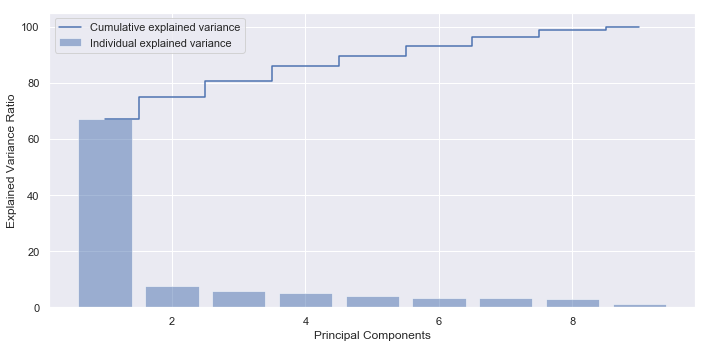

In [103]:
tot = sum(eig_vals)
#Finding Individual variance
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
#Finding cumulative variance
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [106]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 2 PCA dimensions (dimensionality reduction from 4 to 2)

pca = PCA(n_components=3)
data_reduced = pca.fit_transform(data_scaled)
data_reduced.transpose()

array([[-1.57044994,  1.64492301, -1.69088875, ..., -2.16544296,
         4.0169844 ,  2.31470276],
       [-0.06591872, -0.71290497, -0.11157606, ...,  0.16367798,
         0.21384386, -1.50419467],
       [ 0.58349855, -0.18607533,  0.043812  , ..., -0.22571101,
        -1.53782081, -0.9597774 ]])

C:\Anaconda\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


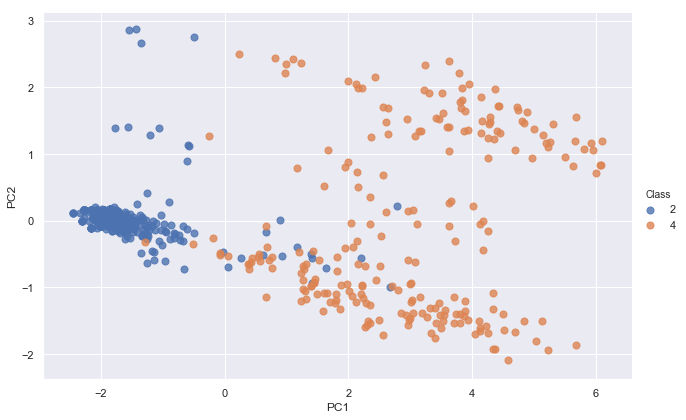

In [109]:
## Plot of PC1 and PC2
data["PC1"] = data_reduced[:,0]
data["PC2"] = data_reduced[:,1]
data["PC3"] = data_reduced[:,2]

vis = sns.lmplot(data = data[["PC1","PC2","Class"]], x = "PC1", y = "PC2",fit_reg=False, hue = "Class",\
                 size = 6, aspect=1.5, scatter_kws = {'s':50}, )
vis.savefig("pca.png")

C:\Anaconda\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


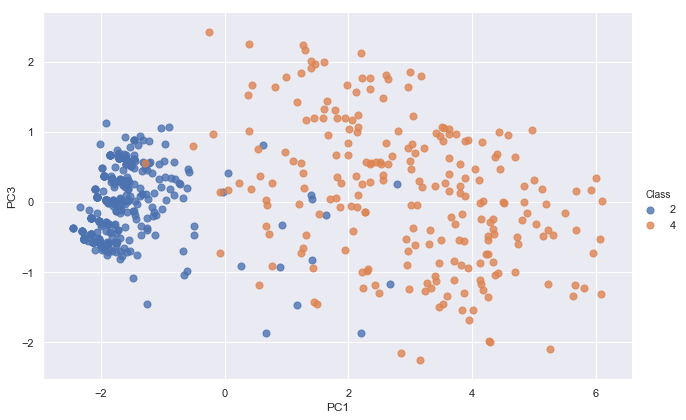

In [110]:
vis = sns.lmplot(data = data[["PC1","PC3","Class"]], x = "PC1", y = "PC3",fit_reg=False, hue = "Class",\
                 size = 6, aspect=1.5, scatter_kws = {'s':50}, )
vis.savefig("pca.png")

C:\Anaconda\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


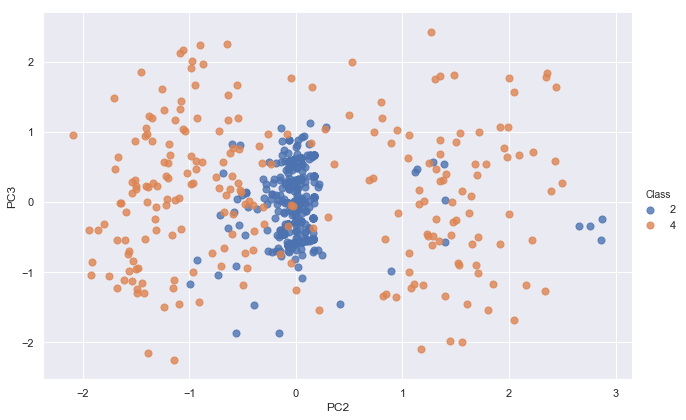

In [111]:
vis = sns.lmplot(data = data[["PC2","PC3","Class"]], x = "PC2", y = "PC3",fit_reg=False, hue = "Class",\
                 size = 6, aspect=1.5, scatter_kws = {'s':50}, )
vis.savefig("pca.png")

# Q10 Find correlation between components and features

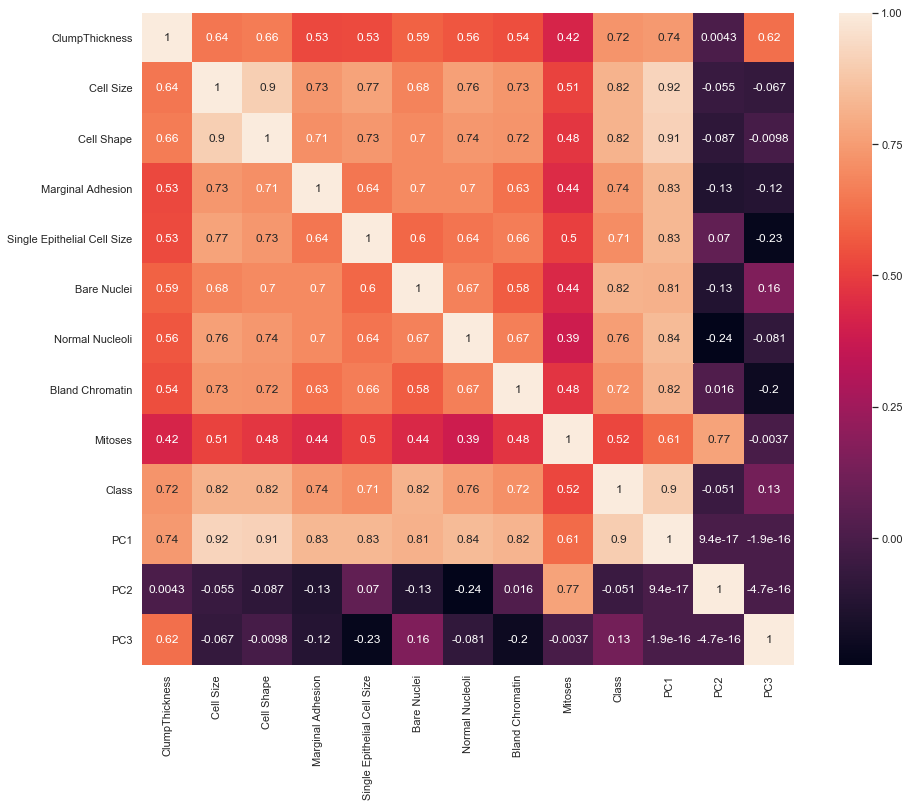

In [112]:
f ,ax = plt.subplots(figsize=(16,12))
sns.heatmap(data.corr(),square=True,annot=True)

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [134]:
df= pd.read_csv("jokes.csv")

In [135]:
df.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [136]:
df.shape

(24983, 101)

# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [137]:
ratings = df.iloc[0:200,1:]

In [138]:
ratings.shape

(200, 100)

In [139]:
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q13 Change the column indices from 0 to 99

In [140]:
ratings.columns = np.arange(100).tolist()
#This will reset the indices from 0 to 99

# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [141]:
ratings.replace(99,0,inplace=True)

In [142]:
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [143]:
scaler = StandardScaler()
ratings_diff = scaler.fit_transform(ratings.T)
#Since we have to do the scaling user wise and not joke id wise , we are doing transpose and then scaling the dataset.

In [144]:
ratings_diff

array([[-0.92720712,  0.27457908, -0.7878666 , ...,  1.24899421,
        -0.30733439,  0.91467957],
       [ 1.98941099, -0.62510643, -0.7878666 , ..., -1.22567595,
        -0.30733439, -1.89065773],
       [-1.25030027,  0.74398021, -0.7878666 , ..., -0.2141883 ,
        -0.30733439, -1.29730489],
       ...,
       [ 0.44593879, -0.49540349, -0.7878666 , ..., -0.04432015,
        -0.30733439, -0.30256632],
       [ 0.44593879, -1.45479352, -0.7878666 , ...,  0.51933328,
        -0.30733439, -0.30256632],
       [ 0.44593879, -0.34511277, -0.7878666 , ...,  0.40737472,
        -0.30733439, -0.30256632]])

### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [ ]:
mean = ratings_diff.mean(axis=1)

In [148]:
mean_df = pd.DataFrame(mean)

In [149]:
ratings = ratings.T
ratings['Mean'] = mean
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,Mean
0,-7.82,4.08,0.00,0.00,8.50,-6.17,0.00,6.84,-3.79,3.01,...,4.47,8.06,1.84,-9.71,5.73,1.80,2.62,0.00,5.58,-0.007507
1,8.79,-0.29,0.00,8.35,4.61,-3.54,0.00,3.16,-3.54,5.15,...,-0.19,3.45,-2.23,-8.25,0.00,5.39,-3.79,0.00,-7.28,-0.045999
2,-9.66,6.36,0.00,0.00,-4.17,0.44,0.00,9.17,-9.42,5.15,...,1.55,3.69,5.49,-8.30,-0.58,8.06,-1.17,0.00,-4.56,-0.107076
3,-8.16,4.37,0.00,0.00,-5.39,-8.50,0.00,-6.21,-6.89,3.01,...,-1.50,-1.36,5.49,-2.62,1.75,-0.10,-0.44,0.00,2.67,-0.329460
4,-7.52,-2.38,9.03,1.80,1.36,-7.09,8.59,-8.16,-8.74,6.41,...,-4.42,3.93,4.37,-8.93,2.86,4.81,-1.02,7.91,7.38,-0.177909


In [152]:
ratings.sort_values("Mean",ascending=False, inplace = True)

In [153]:
ratings.head(10).index

Int64Index([49, 35, 52, 34, 28, 26, 61, 48, 31, 30], dtype='int64')